In [32]:
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format

In [33]:
dataset = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')

unclean_ds1 = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\unclean_dataset_p1.csv')

unclean_ds2 = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\unclean_dataset_p2.csv')

unclean_comb = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\unclean_combined_dataset.csv')


In [34]:
ds1head = unclean_ds1.head(5)

In [35]:
unclean_ds2.head(5)

,tweet_id,text,label
0,625778285025346048,American Voices: Boy Scouts To Lift Ban On Gay...,homophobia
1,555102898556636992,Homosexuality is a disease!pic.twitter.com/Re2...,homophobia
2,535859739163243008,Gay Man Unaware He Focus Of Thousands Of Praye...,homophobia
3,448730038905478976,"Stop smearing feces on the wall, homosexuals! ...",homophobia
4,360126262154510016,A Straight Man Asks How to Ditch a Gay Friend ...,homophobia


In [36]:
print(dataset.head(3).to_latex())

\begin{tabular}{lrllllr}
\toprule
{} &                 id &                                               text & Annotation &                                         clean\_text &                                      clean\_text\_sl &  Hate \\
\midrule
0 & 596965466238619648 &  I just found the *perfect* rental. Why can't m... &    Neither &  i just found the perfect rental why cant my le... &              found perfect rental cant lease right &     0 \\
1 & 575891807873040384 &  @wetsprocket every time they "discover" anythi... &    Neither &   every time they discover anything its either ... &  every time discover anything either incorrect ... &     0 \\
2 & 595259457828884480 &  ok time to write code bbl.\textbackslash n\textbackslash nmaking a new thing. &    Neither &    ok time to write code bbl\textbackslash n\textbackslash nmaking a new thing &            ok time write code bbl making new thing &     0 \\
\bottomrule
\end{tabular}



In [37]:
print("size of dataset:", len(dataset), "\n")
print("class distribution of dataset:")
print(dataset['Annotation'].value_counts().to_latex())

size of dataset: 6815 

class distribution of dataset:
\begin{tabular}{lr}
\toprule
{} &  Annotation \\
\midrule
Neither    &        5719 \\
Sexism     &         911 \\
Racism     &          98 \\
Homophobia &          87 \\
\bottomrule
\end{tabular}



<AxesSubplot:>

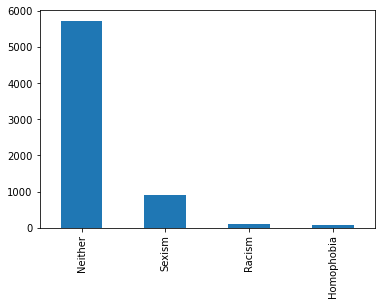

In [38]:
dataset['Annotation'].value_counts().plot(kind = 'bar')

In [39]:
none, sexism, racism, both = dataset['Annotation'].value_counts().values
dataset_size = len(dataset)
print("Percentage of tweets that contain no hate speech:", none / dataset_size, "%")
print("Percentage of tweets that contain sexism:", sexism / dataset_size, "%")
print("Percentage of tweets that contain racism:", racism / dataset_size, "%")
print("Percentage of tweets that contain both sexism and racism:", both / dataset_size, "%")

Percentage of tweets that contain no hate speech: 0.8391782831988261 %
Percentage of tweets that contain sexism: 0.13367571533382244 %
Percentage of tweets that contain racism: 0.01438004402054292 %
Percentage of tweets that contain both sexism and racism: 0.01276595744680851 %


In [40]:
#example tweets
print("Examples of tweets which fall within each class:")
dataset.iloc[[6,1000,6724,6752]]

Examples of tweets which fall within each class:


,id,text,Annotation,clean_text,clean_text_sl,Hate
6,567833561127997440,Buttons are weird. Gave up trying to hit them ...,Neither,buttons are weird gave up trying to hit them i...,button weird gave trying hit right spot starte...,0
1000,575605236464795648,@cbleiker #GermanProfessor gives meaning to te...,Sexism,germanprofessor gives meaning to term feminaz...,germanprofessor give meaning term feminazidoes...,1
6724,572969595155308480,@JillWetzler I ❤️ u,Neither,i u,u,0
6752,298613187497049984,"""Sweet Cakes"" is an Oregon bakery that refuses...",Homophobia,sweet cakes is an oregon bakery that refuses t...,sweet cake oregon bakery refuse make cake same...,1


In [41]:
hate_type = 'Homophobia'

racismdf = dataset.loc[dataset['Annotation'] == hate_type]

racismdf.head(60)

,id,text,Annotation,clean_text,clean_text_sl,Hate
6728,625778285025346048,American Voices: Boy Scouts To Lift Ban On Gay...,Homophobia,american voices boy scouts to lift ban on gay ...,american voice boy scout lift ban gay leadersp...,1
6729,555102898556636992,Homosexuality is a disease!pic.twitter.com/Re2...,Homophobia,homosexuality is a diseasepictwittercomreliomnhp,homosexuality diseasepictwittercomreliomnhp,1
6730,535859739163243008,Gay Man Unaware He Focus Of Thousands Of Praye...,Homophobia,gay man unaware he focus of thousands of prayers,gay man unaware focus thousand prayer,1
6731,448730038905478976,"Stop smearing feces on the wall, homosexuals! ...",Homophobia,stop smearing feces on the wall homosexuals,stop smearing feces wall homosexual,1
6732,360126262154510016,A Straight Man Asks How to Ditch a Gay Friend ...,Homophobia,a straight man asks how to ditch a gay friend ...,straight man asks ditch gay friend traveling,1
6733,354765010393760000,STUDY: Homophobia Driven By Fear of Unwanted S...,Homophobia,study homophobia driven by fear of unwanted se...,study homophobia driven fear unwanted sexual a...,1
6734,354014378036702976,"If my son were gay, I'd slap him...http://betw...",Homophobia,if my son were gay id slap him,son gay id slap,1
6735,347826270664531968,Congressman: Gays Should Hide Sexual Orientati...,Homophobia,congressman gays should hide sexual orientatio...,congressman gay hide sexual orientation work,1
6736,344553378694692992,Pat Robertson: Gays will ‘destroy’ Boy Scouts ...,Homophobia,pat robertson gays will destroy boy scouts to ...,pat robertson gay destroy boy scout accommodat...,1
6737,341447256538505024,Boy Scouts wear uniforms in Utah Pride Parade ...,Homophobia,boy scouts wear uniforms in utah pride parade ...,boy scout wear uniform utah pride parade despi...,1


In [42]:
no_hate = dataset.iloc[6].clean_text
sexism = dataset.iloc[201].clean_text
racism = dataset.iloc[394].clean_text
homophobia = dataset.iloc[6731].clean_text

print("No hate speech:\n", no_hate)
print("\nSexism:\n", sexism)
print("\nRacism:\n", racism)
print("\nHomophobia:\n", homophobia)


No hate speech:
 buttons are weird gave up trying to hit them in the right spot and started swiping to page backwards power button is weird

Sexism:
    man fuck these feminazi s kube we dont need a black history month blacks dont care why solo them out

Racism:
 another arab car terror attack in jerusalem israel will obama call it random traffic infringement    

Homophobia:
 stop smearing feces on the wall homosexuals  


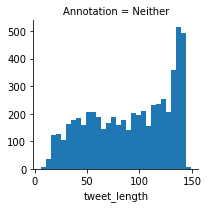

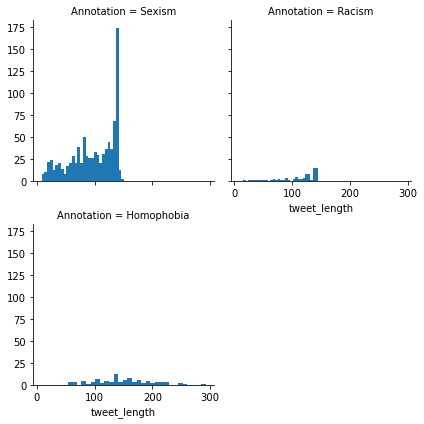

In [47]:
#visualising tweet length based on class
dataset['tweet_length'] = dataset['text'].apply(len)

dataset_hate = dataset[dataset.Annotation != 'Neither']
dataset_no_hate = dataset[dataset.Annotation == 'Neither']


import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset_no_hate, col='Annotation')
graph.map(plt.hist, 'tweet_length', bins=30)

graph = sns.FacetGrid(data=dataset_hate, col='Annotation', col_wrap=2)
graph.map(plt.hist, 'tweet_length', bins=30)

In [44]:
import numpy as np
df = (dataset.groupby('Annotation')['text']
                            .apply(lambda x: np.mean(x.str.len()))
                            .reset_index(name='mean_len_text'))
print(df.to_latex(index=False))

\begin{tabular}{lr}
\toprule
 Annotation &  mean\_len\_text \\
\midrule
 Homophobia &            149 \\
    Neither &             91 \\
     Racism &            106 \\
     Sexism &             97 \\
\bottomrule
\end{tabular}



<AxesSubplot:xlabel='Annotation', ylabel='tweet_length'>

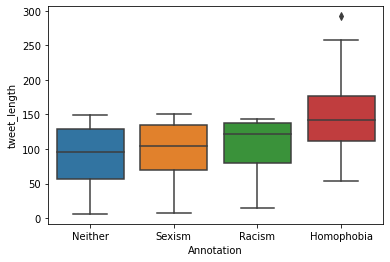

In [45]:
sns.boxplot(x='Annotation', y='tweet_length', data=dataset)

## Tweet Length
Very little variation in the tweet lengths in relation to classes

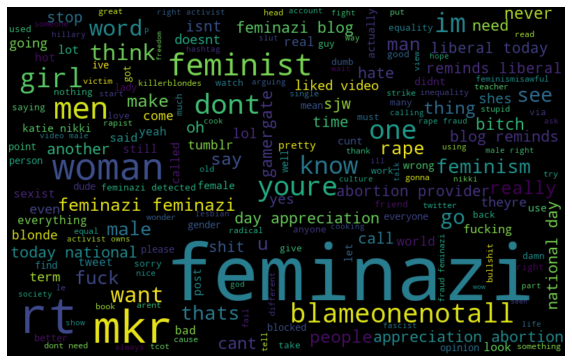

In [68]:
# wordcloud for common words in dataset for the hateful classes
from wordcloud import WordCloud
hate_speech_sexism = ' '.join([text for text in dataset['clean_text_sl'][dataset['Annotation'] == 'Sexism']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hate_speech_sexism)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [69]:
from collections import Counter

split_text = hate_speech_sexism.split()
  
Counter = Counter(split_text)
  
most_occur = Counter.most_common(4)
  
print(most_occur)

[('feminazi', 570), ('rt', 150), ('mkr', 126), ('woman', 83)]


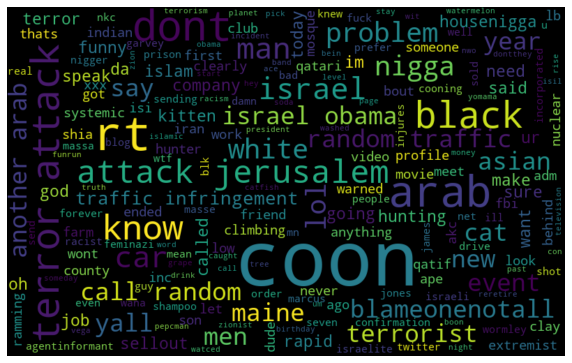

In [70]:
# wordcloud for common words in dataset for the hateful classes
from wordcloud import WordCloud
hate_speech_racism = ' '.join([text for text in dataset['clean_text_sl'][dataset['Annotation'] == 'Racism']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hate_speech_racism)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [74]:
from collections import Counter

split_text = hate_speech_racism.split()
  
Counter = Counter(split_text)
  
most_occur = Counter.most_common(4)
  
print(most_occur)

[('coon', 69), ('arab', 17), ('rt', 16), ('terror', 13)]


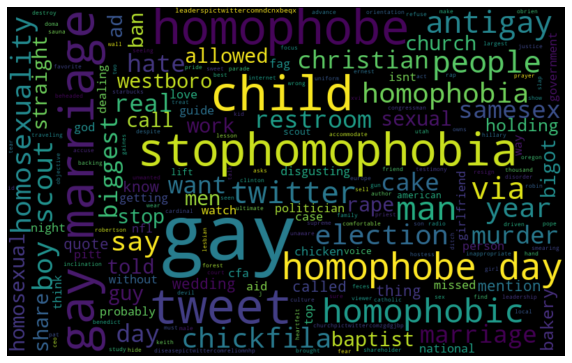

In [72]:
# wordcloud for common words in dataset for the hateful classes
from wordcloud import WordCloud
hate_speech_homophobia = ' '.join([text for text in dataset['clean_text_sl'][dataset['Annotation'] == 'Homophobia']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hate_speech_homophobia)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [67]:
from collections import Counter

split_text = hate_speech_homophobia.split()
  
Counter = Counter(split_text)
  
most_occur = Counter.most_common(4)
  
print(most_occur)

[('gay', 40), ('homophobe', 15), ('marriage', 11), ('day', 10), ('child', 8)]
